In [1]:
%load_ext zipline
%load_ext dotenv
%dotenv
import pyfolio as pf
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [1]:
live_start_date='2017-01-01'
live_start_date

'2017-01-01'

# Full Tear Sheet

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,85.11,2015-02-23,2016-05-12,2017-02-01,508
1,27.35,2014-11-26,2015-01-16,2015-01-29,47
2,20.96,2017-05-12,2017-06-16,2017-08-02,59
3,20.43,2014-09-02,2014-10-16,2014-10-23,38
4,18.97,2017-09-01,2017-09-25,2017-10-30,42


Stress Events,mean,min,max
Apr14,1.91%,-5.38%,34.49%
Oct14,0.99%,-4.93%,8.92%
Fall2015,-0.19%,-20.85%,24.73%
New Normal,0.42%,-37.68%,50.33%


Top 10 long positions of all time,max
sid,
AAPL,1354.10%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
AAPL,1354.10%


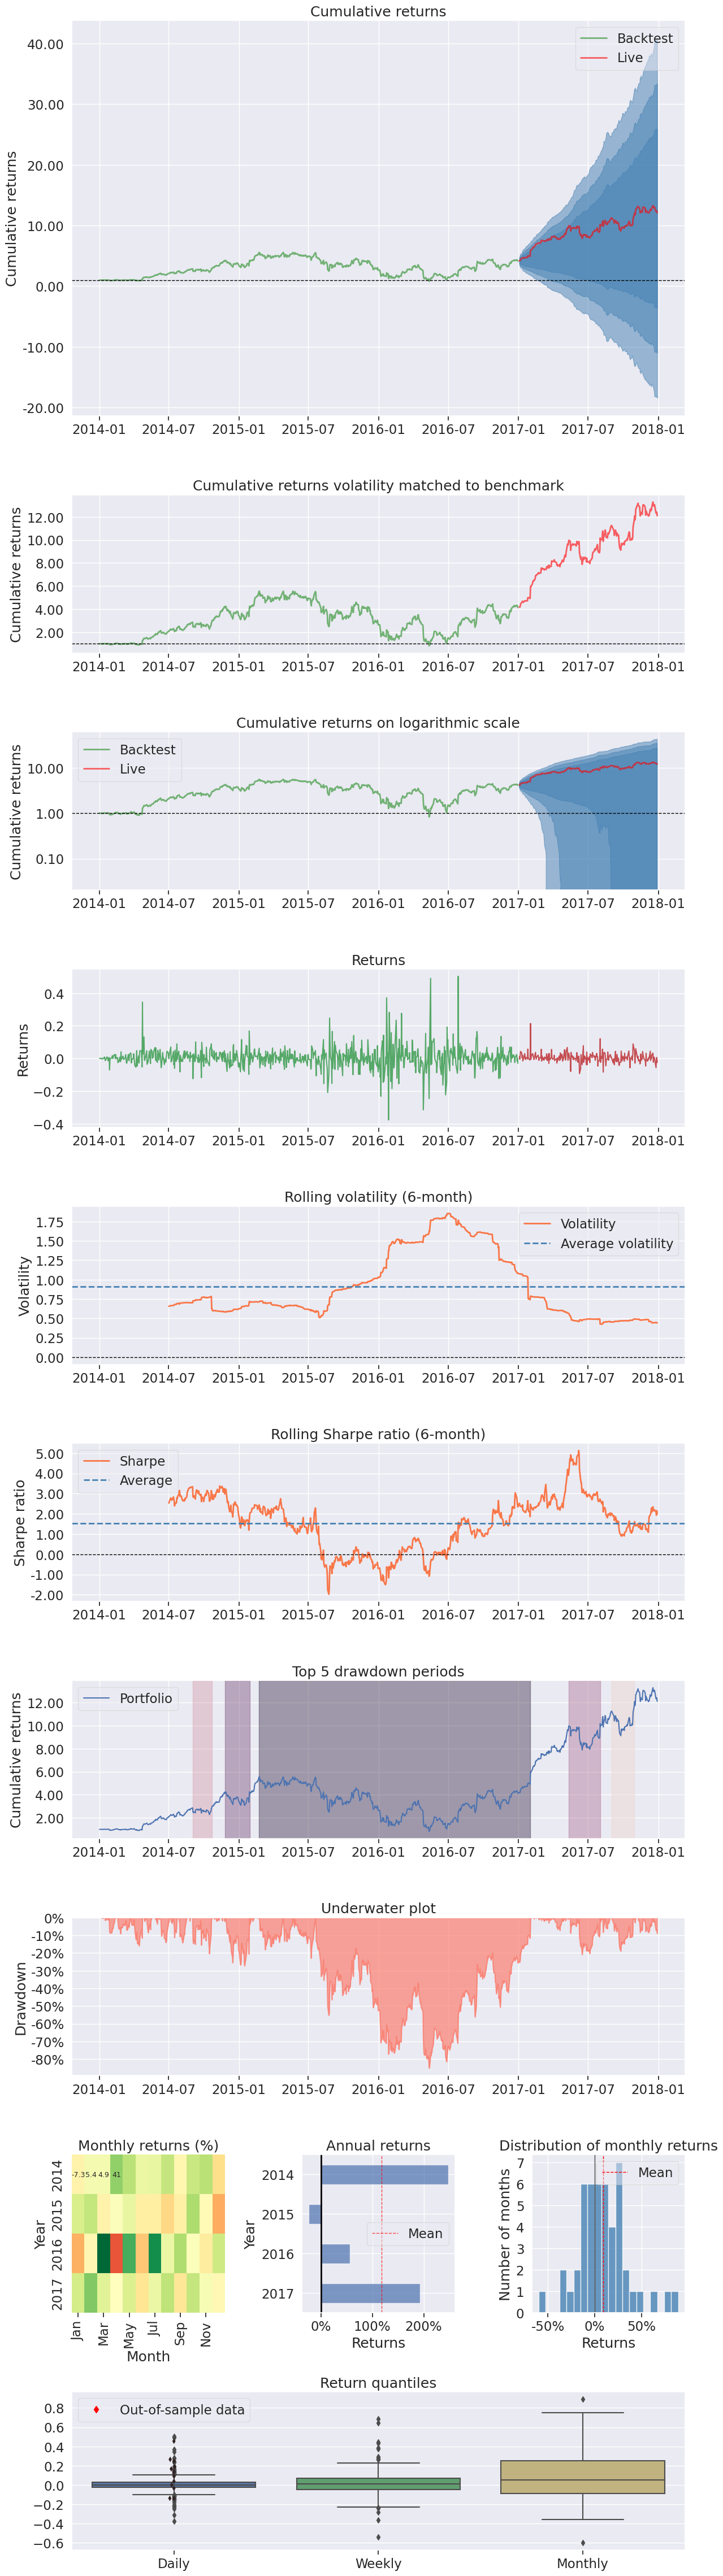

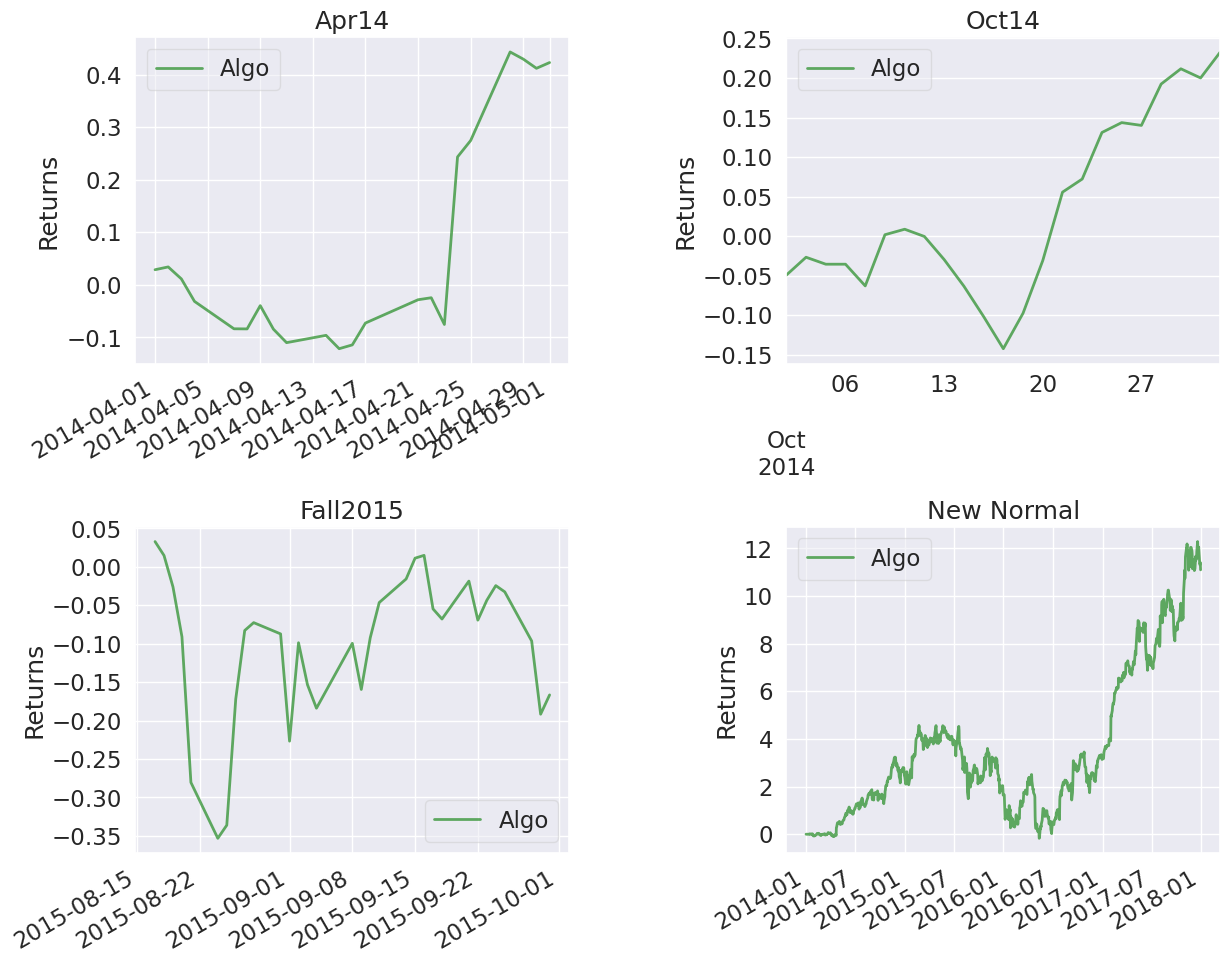

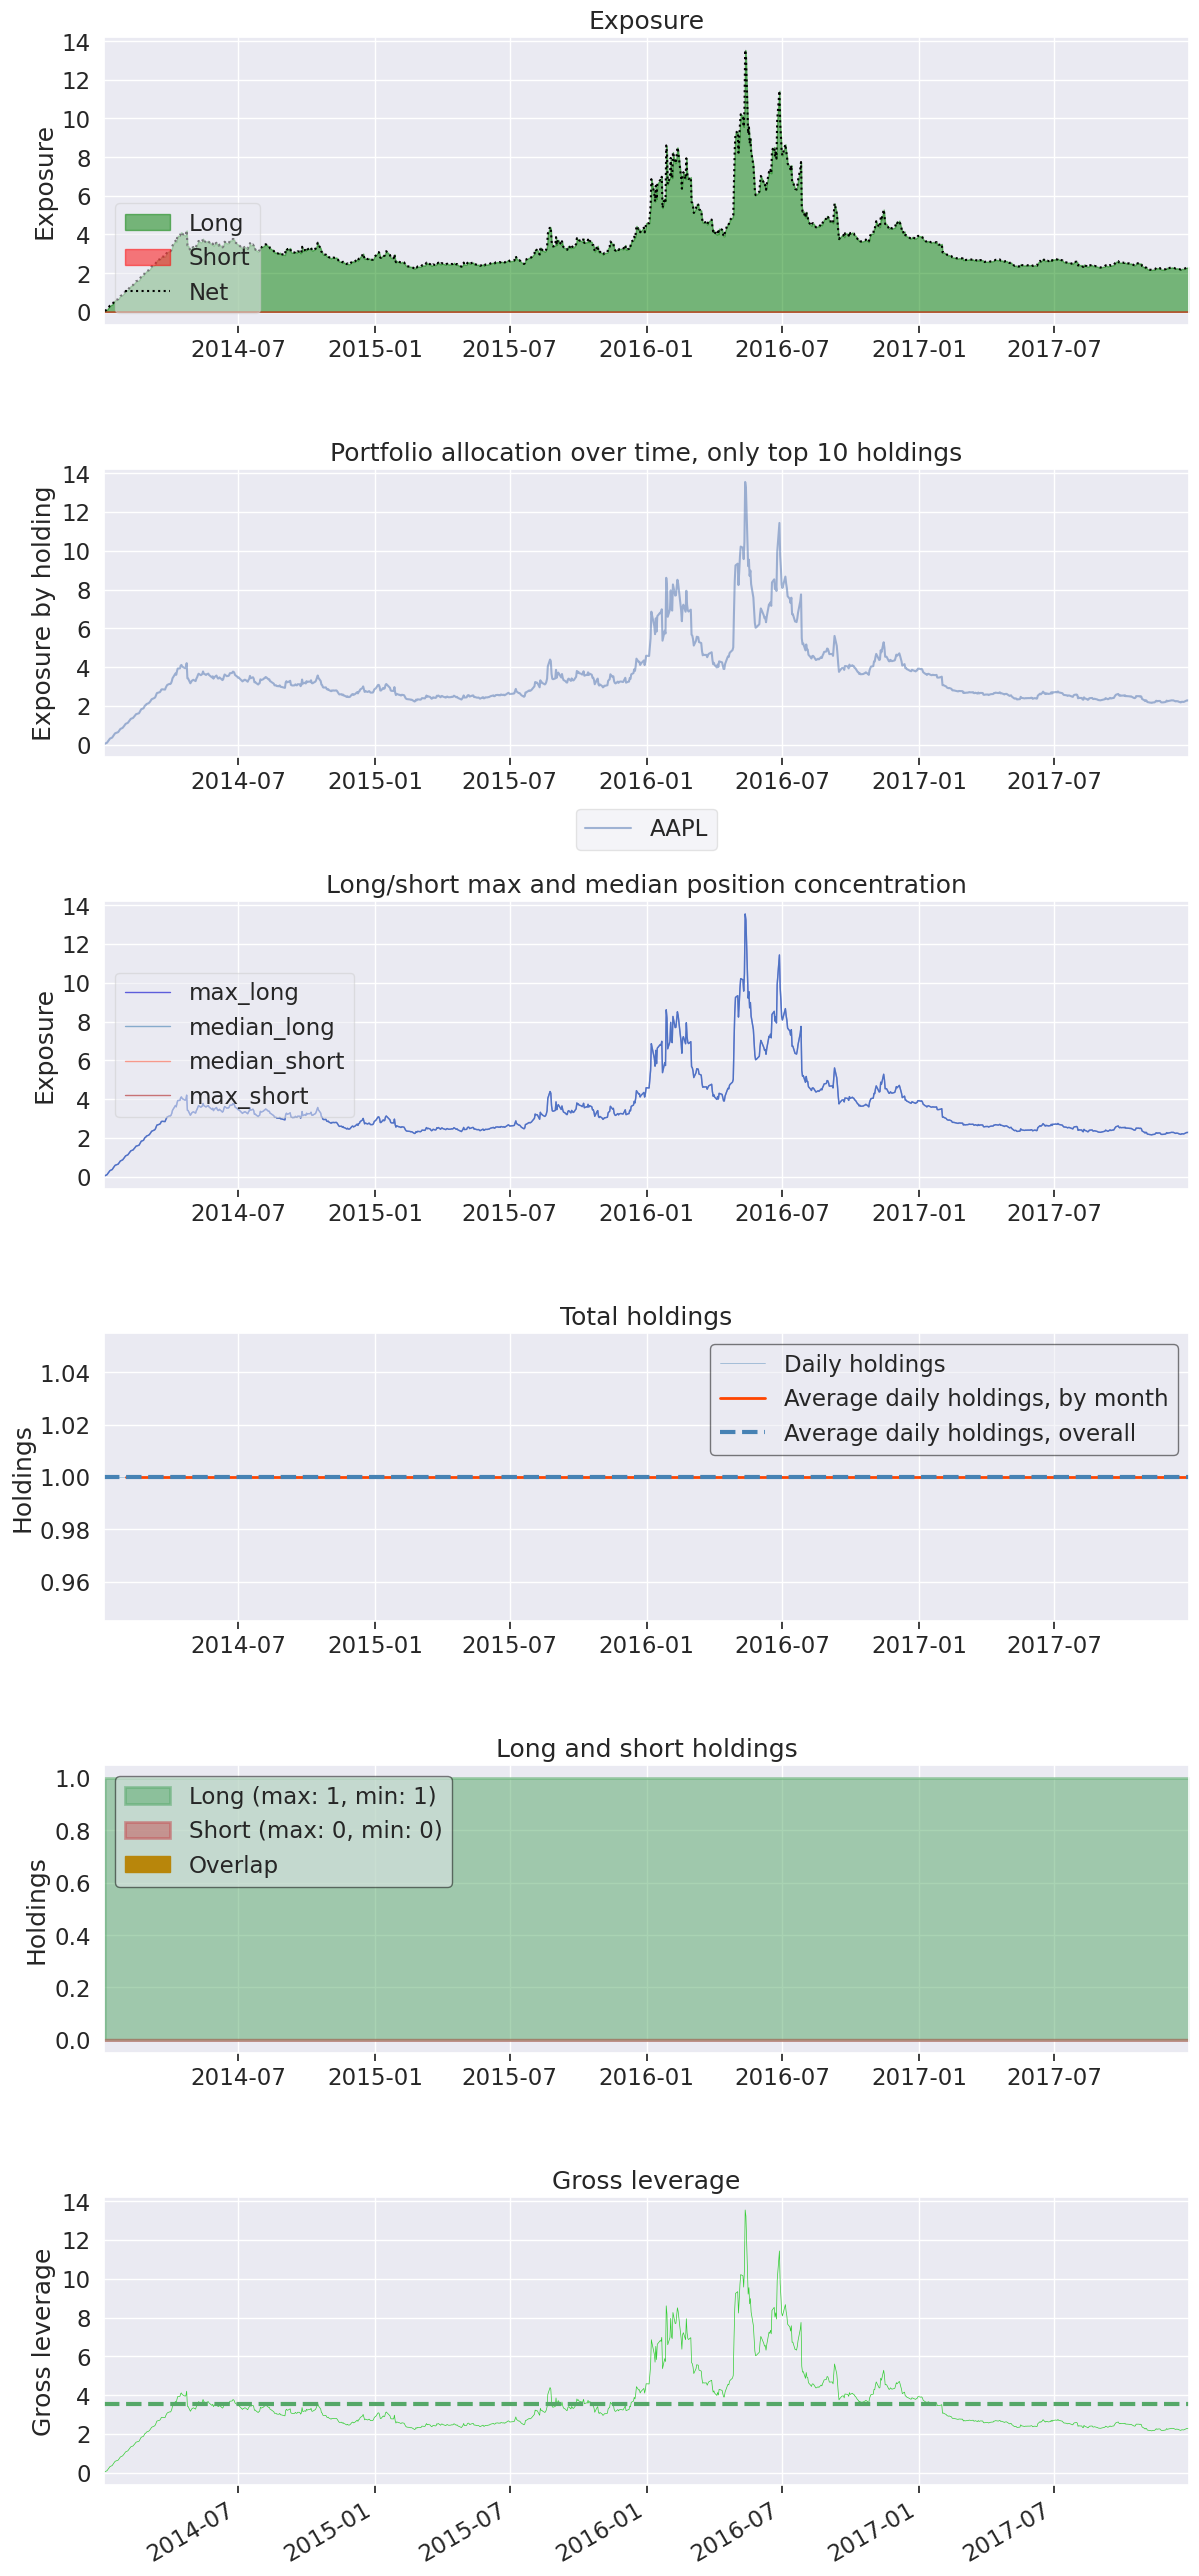

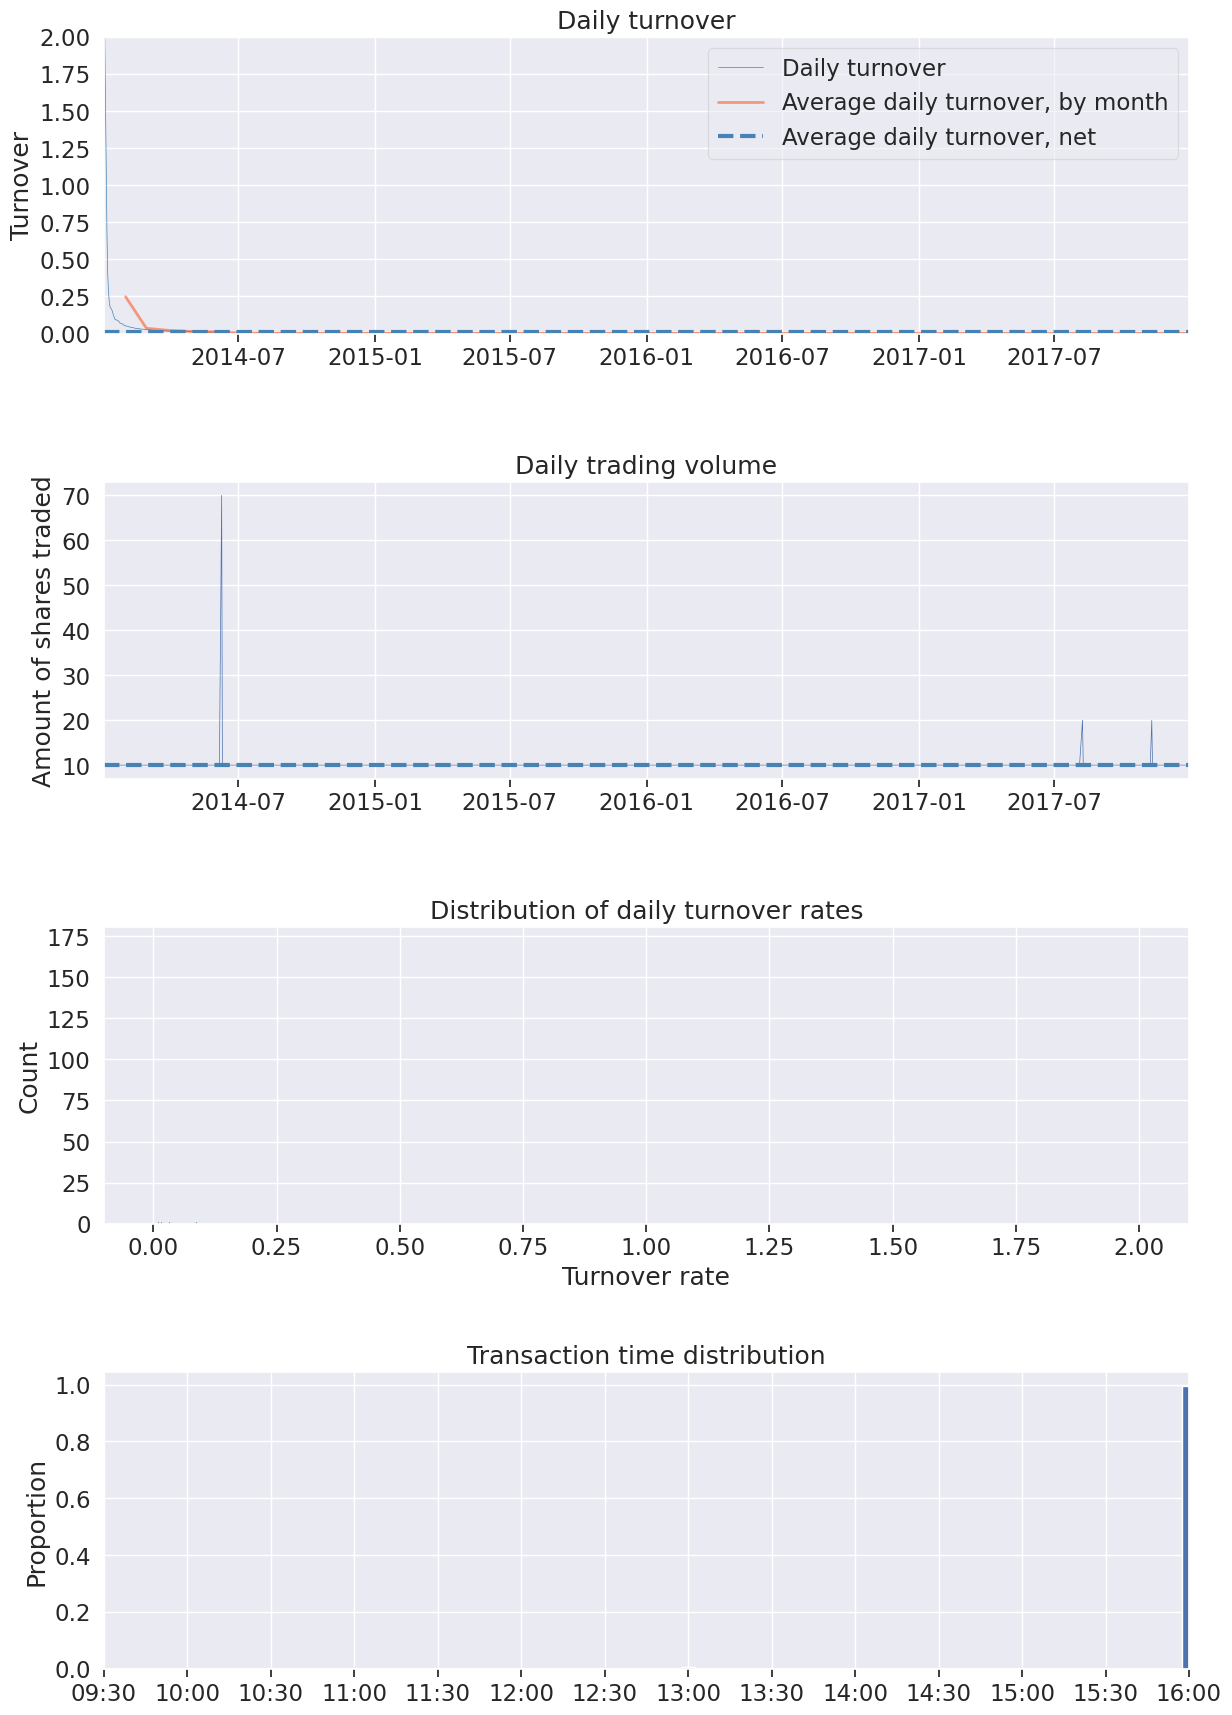

In [8]:
results = pd.read_pickle(os.path.join(os.environ['ROOT_DIR'], 'data/processed', 'experiment_1.pkl'))
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, live_start_date=live_start_date, round_trips=True)